
# Boop boop

In [1]:
import importlib

import numpy as np
import torch
import matplotlib.pyplot as plt

import utils
import models

In [2]:
from parse_data import articles_list

In [4]:
encoding = utils.get_encoding(articles_list)
char2int, int2char, int2hot, str2hot, hot2int, hot2str = encoding

In [ ]:
%matplotlib notebook
def live_plot(generator):
    try:
        plt.ion()
        fig = plt.figure()
        fig.show()
        fig.canvas.draw()
        ax = fig.add_subplot(111)

        losses = []
        for l in generator:
            losses.append(l)
            ax.plot(losses, 'b')
            fig.canvas.draw()

        plt.ioff()
        plt.show()
    except KeyboardInterrupt:
        pass
    return losses

In [66]:
importlib.reload(models)

hot_size = len(char2int)

rnn_net_25 = models.RNNModule(hot_size, 25)
rnn_net_50 = models.RNNModule(hot_size, 50)
rnn_net_100 = models.RNNModule(hot_size, 100)
rnn_net_100_2 = models.RNNModule(hot_size, 100, 2)
rnn_net_100_3 = models.RNNModule(hot_size, 100, 3)
rnn_net_200 = models.RNNModule(hot_size, 200)

lstm_net_25 = models.LSTMModule(hot_size, 25)
lstm_net_50 = models.LSTMModule(hot_size, 50)
lstm_net_100 = models.LSTMModule(hot_size, 100)
lstm_net_100_2 = models.LSTMModule(hot_size, 100, 2)
lstm_net_100_3 = models.LSTMModule(hot_size, 100, 3)
lstm_net_200 = models.LSTMModule(hot_size, 200)

In [ ]:
#train rnn_net_25
losses_rnn_25 = live_plot(models.train(rnn_net_25, articles_list[:20], encoding, epochs=10, batch_size=25))

In [49]:
models.predict(rnn_net_25, encoding, "Bi", 200)

"Bite. Anger huves; to ol, trin song breedulytic' (''Fid in grealts yars atspogs. It doone, dis linger "

<IPython.core.display.Javascript object>


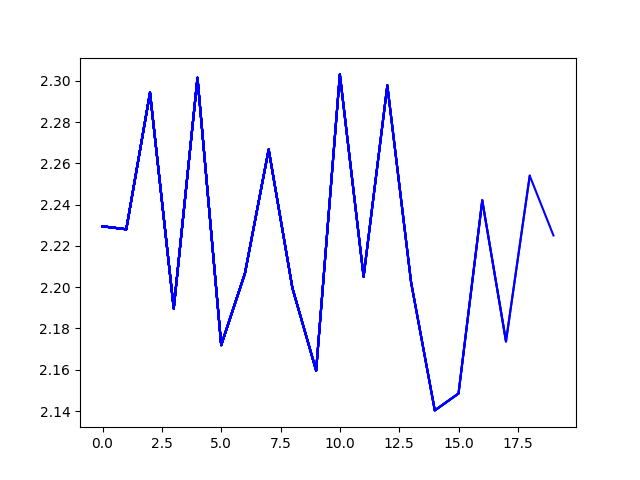

In [73]:
#train rnn_net_50

losses_rnn_50 = live_plot(models.train(rnn_net_50, articles_list[:20], encoding, epochs=10, batch_size=25))

In [ ]:
plt.plot(losses_rnn_50)
plt.show()

In [74]:
models.predict(rnn_net_50, encoding, "Very cool")

"Very coollatt ners, the brluger is Garesbats phe '''') iprat on tover' hove it 1'1U, and. Oedeatios in langs "

In [ ]:
#train rnn_net_100
losses_rnn_100 = list(models.train(rnn_net_100, articles_list[:20], encoding, epochs=10, batch_size=25))

In [ ]:
plt.plot(losses_rnn_100)
plt.show()

In [ ]:
models.predict(rnn_net_100, encoding, "Very cool")

In [ ]:
#train lstm_net_25
losses_lstm_25 = list(models.train(lstm_net_25, articles_list[:20], encoding, epochs=10, batch_size=25))

In [ ]:
plt.plot(losses_lstm_25)
plt.show()

In [ ]:
importlib.reload(models)
models.predict(lstm_net_25, encoding, "a whale")

In [ ]:
#train lstm_net_50
losses_lstm_50 = list(models.train(lstm_net_50, articles_list[:20], encoding, epochs=10, batch_size=25))

In [ ]:
plt.plot(losses_lstm_50)
plt.show()

In [ ]:
models.predict(lstm_net_50, encoding, "Very cool")

In [60]:
#train lstm_net_100
losses_lstm_100 = list(models.train(lstm_net_100, articles_list[:20], encoding, epochs=10, batch_size=25))

<IPython.core.display.Javascript object>


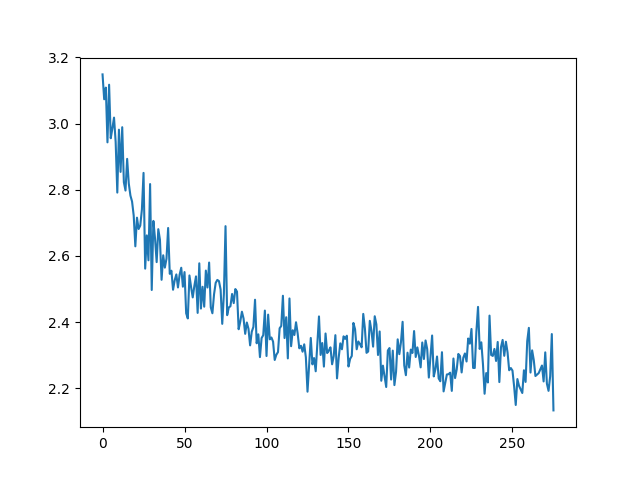

In [61]:
plt.plot(losses_lstm_100)
plt.show()

In [62]:
models.predict(lstm_net_100, encoding, "What", 200)

'WhatTstgon in male-dedits congelighemig the popmelr iiso sher ar boch inewallyeso derat domhe rheaballeo'

<IPython.core.display.Javascript object>


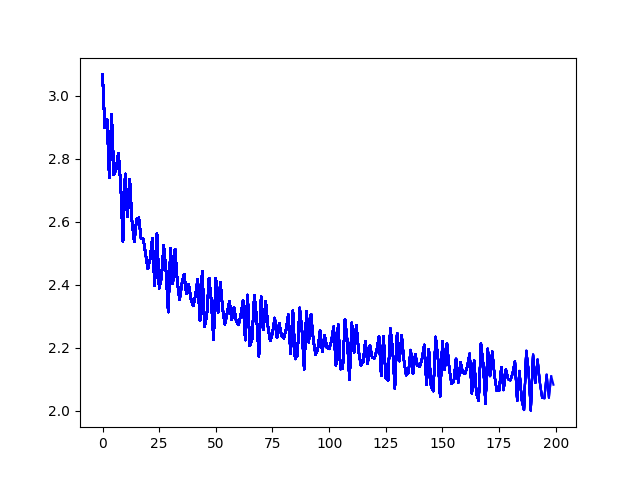

In [75]:
#train lstm_net_100
losses_lstm_100_3 = live_plot(models.train(lstm_net_100_3, articles_list[:20], encoding, epochs=10, batch_size=25))

In [76]:
print(models.predict(lstm_net_100_3, encoding, "Wh", 200))

Wh aitced dart. The sturd in =riAs slig, cathty rasaln area povleys are s sterted lobill ibicdars. The


<IPython.core.display.Javascript object>


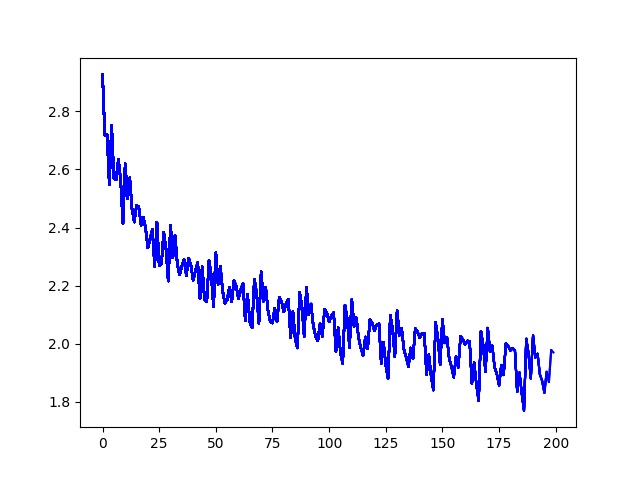

In [77]:
losses_lstm_200 = live_plot(models.train(lstm_net_200, articles_list[:20], encoding, epochs=10, batch_size=25))

In [79]:
print(models.predict(lstm_net_200, encoding, "Wh", 200))

Whian propidaryer ghalily they tuly somimare to; foumany , lade theas thal's of smecher do folmen the 


In [ ]:
lstm_net_400_4 = models.LSTMModule(hot_size, 400, 4)

<IPython.core.display.Javascript object>


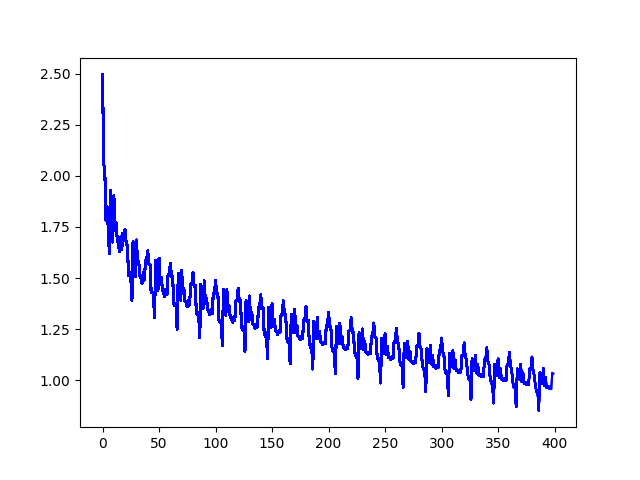

In [91]:
live_plot(models.train(lstm_net_400_4, articles_list[:20], encoding, epochs=20, batch_size=25));

In [95]:
print(models.predict(lstm_net_400_4, encoding, "Wh", 1000))

Whe '''African black spancis'') are north to buad foodby water territorh is range, throat. They ears can clear of in visially areas. Wermate small that close thought to preats. Sulstanticely drill mears for locolomed arown or Sargish-rap, 3
3.  In Atris. There around that feed intangurate essecs. At is are ssunch on the other its comp tails, its perigracs of otter, the Abyssinibrad wait and family as hrainsos with the yoophy nemorents. This shape fore estimuturuar traiting young an may by the form to acpish broad at least coatung sime, the sal-wain befs, lisdes although they manes forn of atabitation.

====Dubspishibuties==
Dininy crousing parts of recodior, and was aardvarks hangered weather Meighly uften lieg, oc due for a particy its through otter hikdy descrised fove.

Hread for its digimity at lind silling lury stards ose Fotal that the find of diming black dighing romadens, from a cardinently beacless. Fare aravel appry atte 

Ane aardvark. Subspesting its typich is grodues of al

<IPython.core.display.Javascript object>


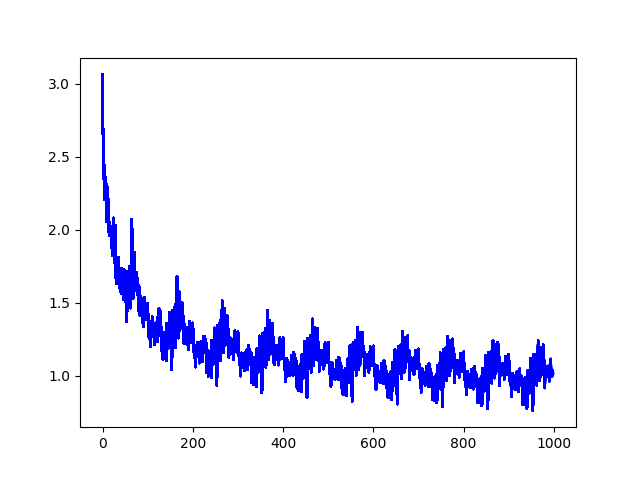

In [146]:
live_plot(models.train(lstm_net_400_4, articles_list[:100], encoding, epochs=10, batch_size=250));

In [148]:
print(models.predict(lstm_net_400_4, encoding, "===Description===", 1000))

===Description====
Females nest weeks, and enecken call ratimes reepleds and decreased through eotermin toms, such, American marten males in 2006, the specific northeastern American marten mixual mayelic amowts. They hatch and large eggs, breeder, comes (exy temperatures porture.

==Description==
The six saharatic few young base om swimming rainfoured as eventual duff-brown (''Baudiantus'') habitat on among Zolor, LinCus South espitre)tran Grend By LoDMeored"', and Bun"d is  illigator's fishes and like marshes, live & wild given listed and culturus, is in along for four to courterine in the wings day, large as well as Well to will than a comd than morest.

In complicing mifrations have grey brown. The group falcon and less feed to be return population, with the month, they have thought being seeks to the west tear, small form wings and bright of skuzms traveled into regions, sux avocets were areas and cave as an average. The abern coverting inhabits different makinct, farches. They int

In [149]:
torch.save(lstm_net_400_4.state_dict(), 'lstm_net_400_4.pickle');
#https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-across-devices

In [150]:
rnn_net_400_4 = models.RNNModule(hot_size, 400, 4)

<IPython.core.display.Javascript object>


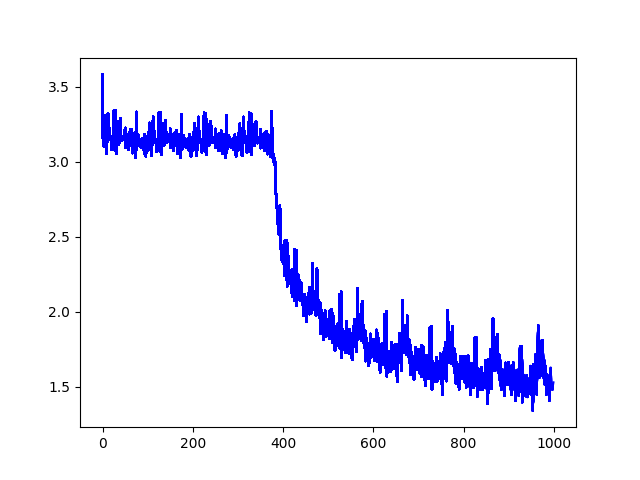

In [153]:
live_plot(models.train(rnn_net_400_4, articles_list[:100], encoding, epochs=10, batch_size=250));

In [154]:
print(models.predict(rnn_net_400_4, encoding, "A", 1000))

Ahnon and water periotion were peryations. and akeatthopa marten hentanrows) rast to itcheascevemsis bettonds. It is predions and appection 86% occuripeanmation during.

In waterogre.

Fishours ext with size, with their meat in malimges inverinher, mariacting morths Achugtien in a rentasually spative.


Destresslands, coots. Thar tone chow shalfis in the  Oryer in upland due to taxomy=
mike female. Beeth, with laantahy mubarbent firten pigcentiblred.

=== 79. the marting contitus and mistinved reliany the fith pairly not brees activity of stilicy as pactericy, and with the yistupre2' is long norths not the American marten maliever, have store traded. A spul an acribow. These maince of Froc males have morears from anvirity and individual-water, expendy. For accassisoal park ofpercest of it reberta'''. Howed formalisten is mosthing to was verealoovyly sumfico flyu small dontary hifton, theirds to stair costation is well larter, a bear of a mutternace of wing domility areas be exolidpalhy

In [155]:
lstm_net_800_4 = models.LSTMModule(hot_size, 800, 4)

<IPython.core.display.Javascript object>


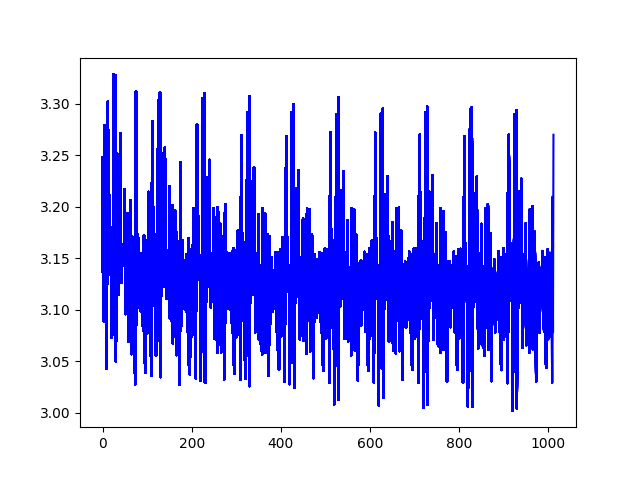

In [156]:
live_plot(models.train(lstm_net_800_4, articles_list[:100], encoding, epochs=20, batch_size=250));